In [ ]:
#-------------------- ASSIGNMENT 3: HOUSE PRICES --------------------
#                  COMP3122 | KAILIE FIELD | 100627702
#                           15 November 2024
#--------------------------------------------------------------------

In [27]:
#---- IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
#---- LOADING DATASETS
house_train = pd.read_csv("train.csv")
house_test = pd.read_csv("test.csv")

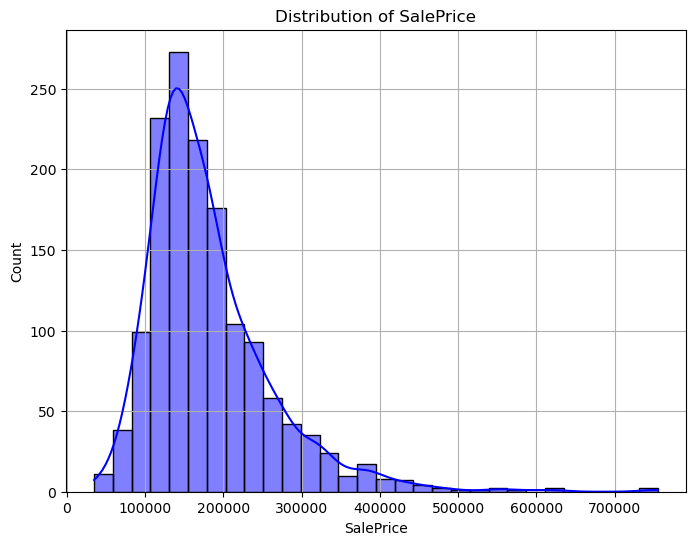

In [29]:
#---- STEP 1: VISUALIZING TARGET VARIABLE
plt.figure(figsize=(8,6))
sns.histplot(house_train['SalePrice'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.grid(True)
plt.show()

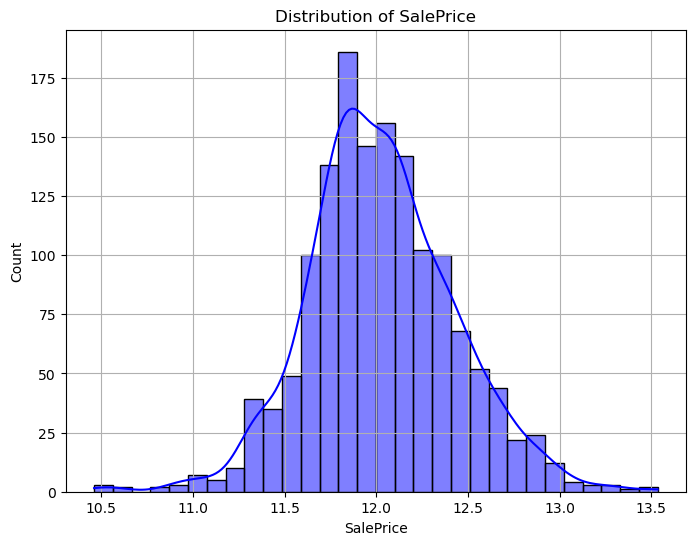

In [38]:
#---- APPLYING LOG TRANSFORMATIONS TO PREVENT SKEWNESS
house_train['LogSalePrice'] = np.log(house_train['SalePrice'])
#---- visualizing the transformation
plt.figure(figsize=(8,6))
sns.histplot(house_train['SalePrice'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [39]:
#---- STEP 2: HANDLE MISSING VALUES FOR NUMERICAL FEATURES
numeric_features_train = house_train.select_dtypes(include=['number']).columns
numeric_features_test = [col for col in numeric_features_train if col in house_test.columns]

#---- fill missing values for numerical features with the mean
house_train[numeric_features_train] = house_train[numeric_features_train].fillna(house_train[numeric_features_train].mean())
house_test[numeric_features_test] = house_test[numeric_features_test].fillna(house_test[numeric_features_test].mean())

#---- VISUALIZE
print(house_train[numeric_features_train].describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    22.024023    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.049958    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   180.569112   456.098091  ..

In [40]:
#---- HANDLE MISSING VALUES FOR CATEGORY FEATURES
category_features_train = house_train.select_dtypes(exclude=['number']).columns
category_features_test = house_test.select_dtypes(exclude=['number']).columns

#---- fill missing values for category features with the mode
house_train[category_features_train] = house_train[category_features_train].fillna(house_train[category_features_train].mode().iloc[0])
house_test[category_features_test] = house_test[category_features_test].fillna(house_train[category_features_train].mode().iloc[0])

#---- VISUALIZE
print(house_train[category_features_train].describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460  1460     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454  1419      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1460         1460   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        951          686   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1460       1460       1460   1460   1460        1460     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [41]:
#---- STEP 3: ONE-HOT ENCODING
house_train_encoded = pd.get_dummies(house_train, drop_first=True)
house_test_encoded = pd.get_dummies(house_test, drop_first=True)

#----ALIGNING COLUMNS
house_train_encoded, house_test_encoded = house_train_encoded.align(house_test_encoded, join='inner', axis=1)
print(house_train[category_features_train].describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460  1460     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454  1419      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1460         1460   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        951          686   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1460       1460       1460   1460   1460        1460     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [42]:
#---- STEP 4: TRAINING
X_train = house_train_encoded.drop(columns=['LogSalePrice', 'SalePrice'], errors='ignore')
y_train = house_train['LogSalePrice']

#--- training continued
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
#---- STEP 5: PREDICTIONS
#---- reversing the log transformation
log_predictions = model.predict(house_test_encoded)
predictions = np.exp(log_predictions)
print(predictions)

[11.67710222 11.76303199 12.07156091 ... 11.95696851 11.65635207
 12.29172766]


In [44]:
#---- STEP 6: EVALUATING MODEL
log_y_train_pred = model.predict(X_train)
y_train_pred = np.exp(log_y_train_pred)
print(y_train_pred)

[12.23793759 12.19537171 12.28406869 ... 12.59020145 11.90326077
 11.84828121]


In [46]:
rsme = np.sqrt(mean_squared_error(house_train['SalePrice'], y_train_pred))
print(rsme)

0.10707891047501308


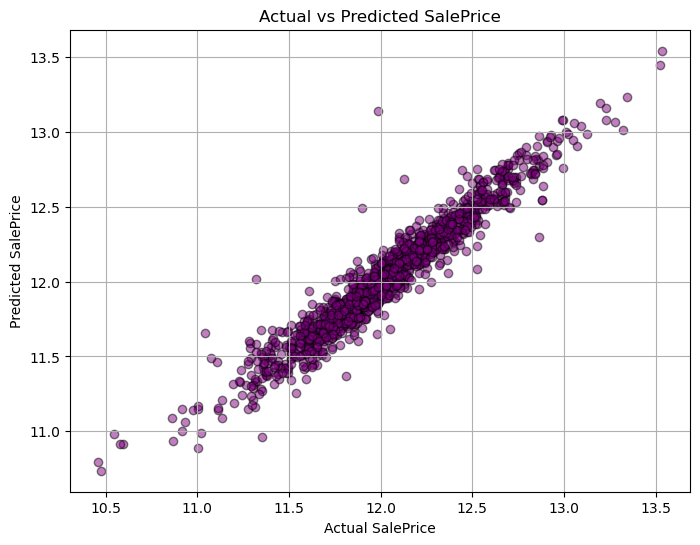

In [47]:
#---- FURTHER VISUALIZATIONS
plt.figure(figsize=(8,6))
plt.scatter(house_train['SalePrice'], y_train_pred, alpha=0.5, color='purple', edgecolor='k')
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.grid(True)
plt.show()

In [49]:
#---- STEP 7: AMALGAMATE TO SUBMISSION CSV
submission = pd.DataFrame({'Id': house_test['Id'], 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)
#---- logging for personal update
print("---- COMPLETED SUCCESSFULLY")

---- COMPLETED SUCCESSFULLY
